In [40]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import skimage.io as io
from copy import deepcopy
img = cv2.imread("/content/drive/MyDrive/images/pick1.png",0)

Question 1: Breaking up into rgb planes.

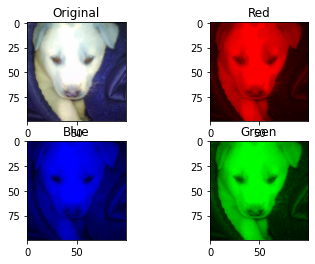

In [42]:
from matplotlib import image
image3 = cv2.imread("/content/drive/MyDrive/images/pick1.png")
  
red = deepcopy(image3)
green = deepcopy(image3)
blue = deepcopy(image3)

red[:,:,1]=0
red[:,:,2]=0

green[:,:,0]=0
green[:,:,2]=0

blue[:,:,0]=0
blue[:,:,1]=0

fig, ax = plt.subplots(ncols=2, nrows=2)

ax[0,0].imshow(image3)
ax[0,0].set_title('Original')

ax[0,1].imshow(red)
ax[0,1].set_title('Red')

ax[1,0].imshow(blue)
ax[1,0].set_title('Blue')

ax[1,1].imshow(green)
ax[1,1].set_title('Green')

plt.show()

Inference: We have used deepcopy from which we are abke to duplicate the image and then seperate there colors and then plotted all the graphs.

Question 2: Reduce no of gray levels

Gray level = 128


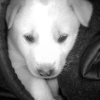

Gray level = 64


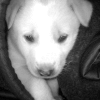

Gray level = 32


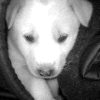

Gray level = 16


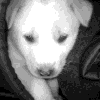

Gray level = 8


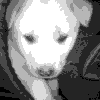

In [44]:
level_images = []

levels = [1, 2, 3, 4, 5]

for level in levels:
    range_per_level = 2**level
    reduced_img = img//range_per_level
    normalized_image = cv2.normalize(reduced_img, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    level_images.append(normalized_image)

for i in range(len(level_images)):
  print(f"Gray level = {2**(8-levels[i])}")
  cv2_imshow(level_images[i])

Inference: We have plotted the different images for different gray level values.

Question 3: Upsampling and Downsampling.

Image Shape: 100 100
Original Image:


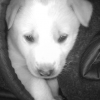

Size of Downsampled image:  (25, 25)
Down Sampled Image:


Size of Up Sampled image:  (100, 100)
Up Sampled Image:


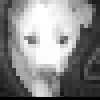

In [50]:
# Obtain the size of the original image
[m, n] = img.shape
print('Image Shape:', m, n)

# Show original image
print('Original Image:')
cv2_imshow(img)


# Down sampling

f = 4

img2 = np.zeros((m//f, n//f), dtype=np.int)

for i in range(0, m, f):
	for j in range(0, n, f):
		try:

			img2[i//f][j//f] = img[i][j]
		except IndexError:
			pass


# Show down sampled image
print("Size of Downsampled image: ", img2.shape)
print('Down Sampled Image:')
cv2_imshow(img2)


# Up sampling

img3 = np.zeros((m, n), dtype=np.int)
for i in range(0, m-1, f):
	for j in range(0, n-1, f):
		img3[i, j] = img2[i//f][j//f]


for i in range(1, m-(f-1), f):
	for j in range(0, n-(f-1)):
		img3[i:i+(f-1), j] = img3[i-1, j]

for i in range(0, m-1):
	for j in range(1, n-1, f):
		img3[i, j:j+(f-1)] = img3[i, j-1]

# Plot the up sampled image
print("Size of Up Sampled image: ", img3.shape)
print('Up Sampled Image:')
cv2_imshow(img3)


Inference: If we observe the size of the image before and after, we see that the size is increased while Upsampling and decreased while Downsampling, i.e., we have up sampled the image.

Question 4: Power Law transformation(Gamma Transformation).

gamma value:  0.2


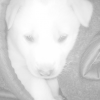

gamma value:  0.8


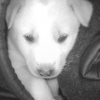

gamma value:  1.2


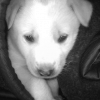

gamma value:  2.5


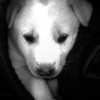

In [30]:
for gamma in [0.2, 0.8, 1.2, 2.5]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  
    # Save edited images.
    cv2.imwrite('gamma_transformed_'+str(gamma)+'.jpg', gamma_corrected)
    print("gamma value: ",str(gamma))
    cv2_imshow(gamma_corrected)

Inference: As can be observed from the outputs, gamma>1 (demonstrated by the bend relating to 'nth power' name on the diagram), the force of pixels diminishes for example the picture becomes more obscure. Then again, gamma<1 (demonstrated by the bend relating to 'nth root' name on the chart), the power increments for example the picture becomes lighter.

Question 5: Histogram Equalization.

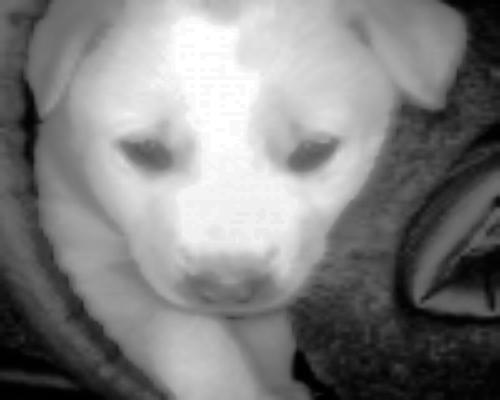

In [52]:
img5 = cv2.resize(img, (500, 400))
img_to_array = np.asarray(img5)

flat_img = img_to_array.flatten()
total_pixels = len(flat_img)#20000


unique, counts = np.unique(flat_img, return_counts=True)
mydict = dict(zip(unique, counts))
pr = []
cum_probab = []

for pixel in mydict:
  pixel_count = mydict[pixel]
  pr.append(float(pixel_count/total_pixels))

cum_probab.append(pr[0])

for i in range(1, len(pr)):
  cum_probab.append(cum_probab[i-1]+pr[i])

s = []
for cp in cum_probab:
  s.append(int(255*(cp)))

[row, col] = img5.shape
final_img = np.zeros((row, col),np.uint8)

corrected_dic = dict(zip(unique, s))
for pixel in corrected_dic:
  for i in range(row):
    for j in range(col):
      if img5[i][j] == pixel:
        final_img[i][j] = corrected_dic[pixel]


cv2_imshow(final_img)

Inference: Histogram equalization is a method in image processing of contrast adjustment using the image’s histogram. Its input is just grayscale image and output is our histogram equalized image.